## Import Libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Importing data

In [2]:
data=pd.read_csv("C:\\Users\\hp\\Downloads\\weather_forecast_data (1).csv")
print(data)

      Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0       23.720338  89.592641    7.335604    50.501694  1032.378759     rain
1       27.879734  46.489704    5.952484     4.990053   992.614190  no rain
2       25.069084  83.072843    1.371992    14.855784  1007.231620  no rain
3       23.622080  74.367758    7.050551    67.255282   982.632013     rain
4       20.591370  96.858822    4.643921    47.676444   980.825142  no rain
...           ...        ...         ...          ...          ...      ...
2495    21.791602  45.270902   11.807192    55.044682  1017.686181  no rain
2496    27.558479  46.481744   10.884915    39.715133  1008.590961  no rain
2497    28.108274  43.817178    2.897128    75.842952   999.119187  no rain
2498    14.789275  57.908105    2.374717     2.378743  1046.501875  no rain
2499    26.554356  97.101517   18.563084    81.357508  1001.729176  no rain

[2500 rows x 6 columns]


## Basic Information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


## Data Cleaning

## Empty cells

In [4]:
data.isna().sum()

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64

### Check Duplicates

In [5]:
print('Number of duplicated rows: ' , len(data[data.duplicated()]))

Number of duplicated rows:  0


## Plotting Boxplot

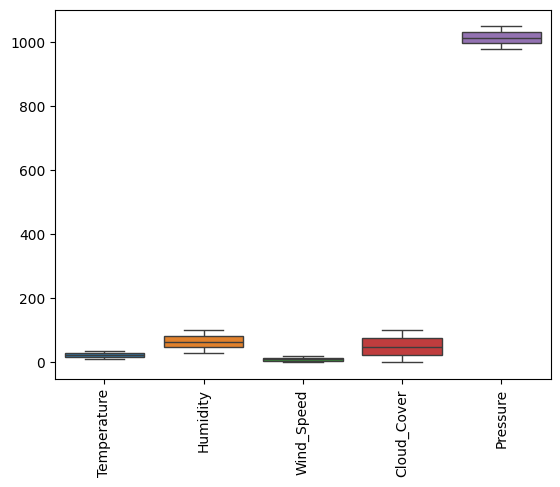

In [6]:
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

## Encoding Categorial Data

In [7]:
categ_col = data.select_dtypes(include=['object']).columns

# Initialize encoders
label_encoder = LabelEncoder()

# Encode each categorical column using Label Encoding for simplicity
encoded_data = data.copy()
for i in categ_col:
    encoded_data[i] = label_encoder.fit_transform(data[i])

# Display the first 5 rows of the encoded dataset
print(encoded_data)

      Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure  Rain
0       23.720338  89.592641    7.335604    50.501694  1032.378759     1
1       27.879734  46.489704    5.952484     4.990053   992.614190     0
2       25.069084  83.072843    1.371992    14.855784  1007.231620     0
3       23.622080  74.367758    7.050551    67.255282   982.632013     1
4       20.591370  96.858822    4.643921    47.676444   980.825142     0
...           ...        ...         ...          ...          ...   ...
2495    21.791602  45.270902   11.807192    55.044682  1017.686181     0
2496    27.558479  46.481744   10.884915    39.715133  1008.590961     0
2497    28.108274  43.817178    2.897128    75.842952   999.119187     0
2498    14.789275  57.908105    2.374717     2.378743  1046.501875     0
2499    26.554356  97.101517   18.563084    81.357508  1001.729176     0

[2500 rows x 6 columns]


## Extract Dependent and Independent Variables

In [8]:
X = encoded_data.iloc[:,0:5]   #Independent variable
y = encoded_data['Rain']     #dependent variable

## ## Statistical Analysis
### (Correlation,Describe) 

In [9]:
print(data.describe())

       Temperature     Humidity   Wind_Speed  Cloud_Cover     Pressure
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000
mean     22.581725    64.347094     9.906255    49.658104  1014.312336
std       7.326996    19.954739     5.780316    29.123104    20.196433
min      10.001842    30.005071     0.009819     0.015038   980.014486
25%      16.359398    47.339815     4.761909    23.900016   996.938630
50%      22.536448    63.920797     9.908572    49.488284  1013.433035
75%      28.976476    81.561021    14.948408    75.324140  1031.735067
max      34.995214    99.997481    19.999132    99.997795  1049.985593


             Temperature  Humidity  Wind_Speed  Cloud_Cover  Pressure   Rain
Temperature        1.000    -0.014      -0.005        0.007    -0.007 -0.266
Humidity          -0.014     1.000       0.004        0.007    -0.032  0.382
Wind_Speed        -0.005     0.004       1.000       -0.000     0.019 -0.001
Cloud_Cover        0.007     0.007      -0.000        1.000     0.023  0.326
Pressure          -0.007    -0.032       0.019        0.023     1.000  0.008
Rain              -0.266     0.382      -0.001        0.326     0.008  1.000


<Axes: >

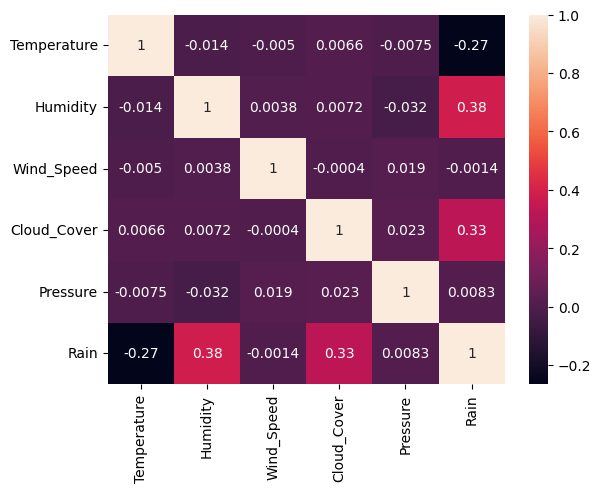

In [10]:
correlation=encoded_data.corr(numeric_only=True)
print(np.around(correlation,decimals=3))
sns.heatmap(correlation,annot=True)

## Split Train and Test Data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build Model

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Fitting the Logistic Regression model to the training set
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Comparing the actual output values for X_test with the predicted values
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(data)



      Actual  Predicted
1447       0          0
1114       0          0
1064       1          0
2287       0          1
1537       0          0
...      ...        ...
2375       0          0
1609       0          0
596        1          1
84         0          0
2213       0          0

[500 rows x 2 columns]


In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predicting the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score is ", accuracy * 100, "%")

# Optionally, include detailed performance metrics:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy score is  93.2 %

Confusion Matrix:
[[429  14]
 [ 20  37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       443
           1       0.73      0.65      0.69        57

    accuracy                           0.93       500
   macro avg       0.84      0.81      0.82       500
weighted avg       0.93      0.93      0.93       500

